In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/archive.zip -d /content/isic2019

Streaming output truncated to the last 5000 lines.
  inflating: /content/isic2019/train-image/image/ISIC_0065357.jpg  
  inflating: /content/isic2019/train-image/image/ISIC_0065358.jpg  
  inflating: /content/isic2019/train-image/image/ISIC_0065359.jpg  
  inflating: /content/isic2019/train-image/image/ISIC_0065360.jpg  
  inflating: /content/isic2019/train-image/image/ISIC_0065361.jpg  
  inflating: /content/isic2019/train-image/image/ISIC_0065362.jpg  
  inflating: /content/isic2019/train-image/image/ISIC_0065366.jpg  
  inflating: /content/isic2019/train-image/image/ISIC_0065367.jpg  
  inflating: /content/isic2019/train-image/image/ISIC_0065368.jpg  
  inflating: /content/isic2019/train-image/image/ISIC_0065370.jpg  
  inflating: /content/isic2019/train-image/image/ISIC_0065371.jpg  
  inflating: /content/isic2019/train-image/image/ISIC_0065372.jpg  
  inflating: /content/isic2019/train-image/image/ISIC_0065374.jpg  
  inflating: /content/isic2019/train-image/image/ISIC_0065376.jpg

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [4]:
!ls /content/isic2019

train-image  train-metadata.csv


In [5]:
import pandas as pd

df = pd.read_csv('/content/isic2019/train-metadata.csv')
df.head()

,Unnamed: 0,isic_id,patient_id,target
0,0,ISIC_0000000,dummy_0,0
1,1,ISIC_0000001,dummy_1,0
2,2,ISIC_0000002,dummy_2,1
3,3,ISIC_0000003,dummy_3,0
4,4,ISIC_0000004,dummy_4,1


In [6]:
# image directory path
image_dir = '/content/isic2019/train-image/'

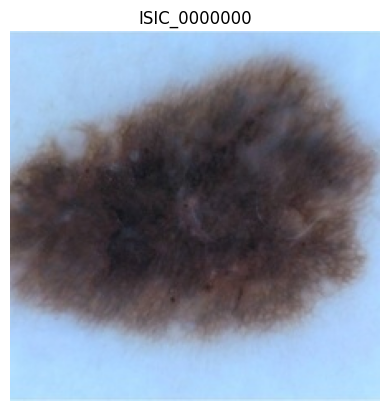

In [7]:
import cv2
import matplotlib.pyplot as plt
import os

sample_img = df.iloc[0]['isic_id']
img_path = os.path.join(image_dir, 'image', sample_img + '.jpg')
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title(sample_img)
plt.axis('off')
plt.show()

In [8]:
if not os.path.exists(img_path):
    print(f"Error: Image file not found at {img_path}")
    print("Checking contents of image directory:")
    !ls {image_dir}

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25331 non-null  int64 
 1   isic_id     25331 non-null  object
 2   patient_id  25331 non-null  object
 3   target      25331 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 791.7+ KB


In [10]:

df.isnull().sum()

,0
Unnamed: 0,0
isic_id,0
patient_id,0
target,0


In [11]:
df['target'].value_counts()

,count
target,
0,20809
1,4522


/tmp/ipython-input-12-954216476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='mako')


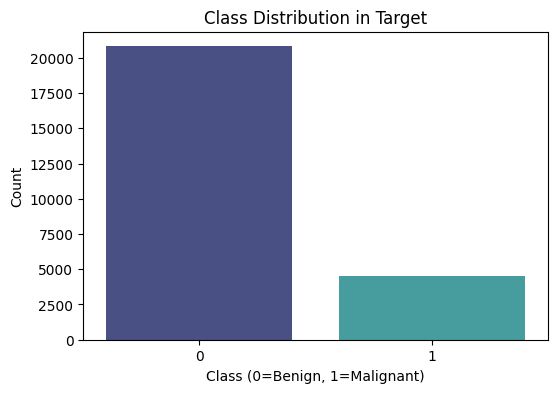

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='mako')
plt.title('Class Distribution in Target')
plt.xlabel('Class (0=Benign, 1=Malignant)')  # Adjust if different meaning
plt.ylabel('Count')
plt.show()

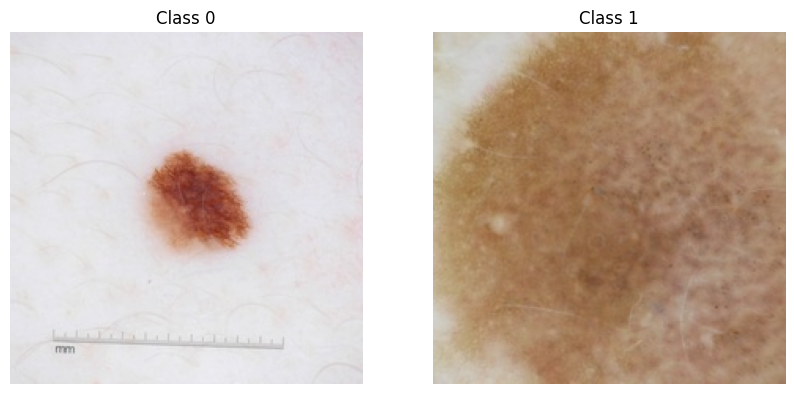

In [13]:
image_dir = '/content/isic2019/train-image/image/'

plt.figure(figsize=(10,5))

# Plot samples for both classes (assuming binary classification 0 and 1)
for i, label in enumerate(df['target'].unique()):
    sample = df[df['target'] == label].sample(1)
    img_path = os.path.join(image_dir, sample.iloc[0]['isic_id'] + '.jpg')
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 2, i+1)
    plt.imshow(img)
    plt.title(f"Class {label}")
    plt.axis('off')

plt.show()

In [14]:
print("Number of unique patients:", df['patient_id'].nunique())

print("Patients per class:")
print(df.groupby('target')['patient_id'].nunique())

Number of unique patients: 25331
Patients per class:
target
0    20809
1     4522
Name: patient_id, dtype: int64


In [15]:
patients = df['patient_id'].unique()

In [16]:
train_patients, temp_patients = train_test_split(patients, test_size=0.3, random_state=42)

In [17]:
val_patients, test_patients = train_test_split(temp_patients, test_size=0.5, random_state=42)

In [18]:
train_df = df[df['patient_id'].isin(train_patients)]
val_df = df[df['patient_id'].isin(val_patients)]
test_df = df[df['patient_id'].isin(test_patients)]

print(f"Train samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")

Train samples: 17731
Validation samples: 3800
Test samples: 3800


In [20]:
# Check unique values and sample some entries in the 'isic_id' column
print("Unique values in 'isic_id' column:", df['isic_id'].nunique())
print("\nSample 'isic_id' values:")
print(df['isic_id'].sample(10).tolist())

Unique values in 'isic_id' column: 25331

Sample 'isic_id' values:
['ISIC_0063985', 'ISIC_0028573', 'ISIC_0030214', 'ISIC_0058640', 'ISIC_0031261', 'ISIC_0073003', 'ISIC_0031181', 'ISIC_0027011', 'ISIC_0072102', 'ISIC_0026048']


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_dir = '/content/isic2019/train-image/image/'

# Convert the target column to string type for binary classification
train_df['target'] = train_df['target'].astype(str)
val_df['target'] = val_df['target'].astype(str)
test_df['target'] = test_df['target'].astype(str)

# Add .jpg extension to the 'isic_id' column if it's not already present
train_df['isic_id'] = train_df['isic_id'].apply(lambda x: x + '.jpg' if not x.endswith('.jpg') else x)
val_df['isic_id'] = val_df['isic_id'].apply(lambda x: x + '.jpg' if not x.endswith('.jpg') else x)
test_df['isic_id'] = test_df['isic_id'].apply(lambda x: x + '.jpg' if not x.endswith('.jpg') else x)


train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 17731 validated image filenames belonging to 2 classes.
Found 3800 validated image filenames belonging to 2 classes.
Found 3800 validated image filenames belonging to 2 classes.


/tmp/ipython-input-19-1886302069.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['target'] = train_df['target'].astype(str)
/tmp/ipython-input-19-1886302069.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['target'] = val_df['target'].astype(str)
/tmp/ipython-input-19-1886302069.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [27]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(train_df['target']), y=train_df['target'])
class_weight_dict = dict(enumerate(class_weights))

In [28]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')  # binary output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

Epoch 1/5
555/555 ━━━━━━━━━━━━━━━━━━━━ 222s 395ms/step - accuracy: 0.8125 - loss: 0.4905 - val_accuracy: 0.8255 - val_loss: 0.4299
Epoch 2/5
555/555 ━━━━━━━━━━━━━━━━━━━━ 218s 392ms/step - accuracy: 0.8188 - loss: 0.4527 - val_accuracy: 0.8253 - val_loss: 0.4962
Epoch 3/5
555/555 ━━━━━━━━━━━━━━━━━━━━ 213s 384ms/step - accuracy: 0.8254 - loss: 0.4345 - val_accuracy: 0.8261 - val_loss: 0.4193
Epoch 4/5
555/555 ━━━━━━━━━━━━━━━━━━━━ 217s 391ms/step - accuracy: 0.8243 - loss: 0.4210 - val_accuracy: 0.8311 - val_loss: 0.4640
Epoch 5/5
555/555 ━━━━━━━━━━━━━━━━━━━━ 213s 383ms/step - accuracy: 0.8262 - loss: 0.4164 - val_accuracy: 0.8324 - val_loss: 0.4265


In [30]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8405 - loss: 0.4042
Test Accuracy: 0.8279


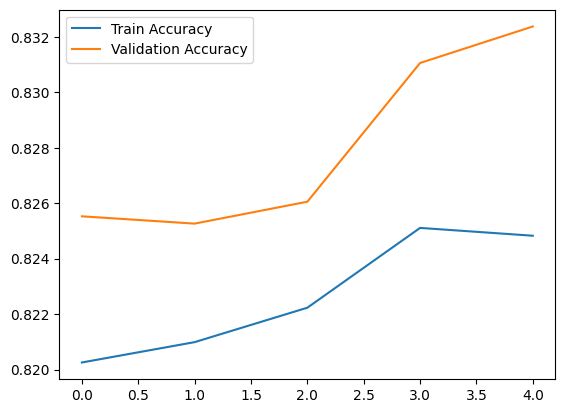

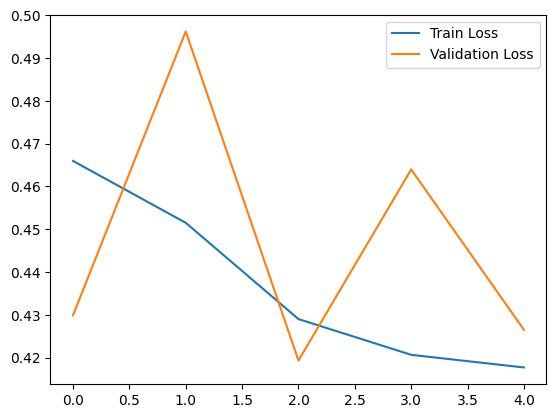

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [25]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")

Final Training Accuracy: 0.8219
Final Validation Accuracy: 0.8253


In [26]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8383 - loss: 0.3921
Test Accuracy: 0.8158
